# Final DSCI 100 Project

## Predicting Subscription Status Based on Age and Playtime

This is the final DSCI 100 project, working on predicting a player's subscription status based on the amount of hours spent playing UBC's *MineCraft* and their age.

## 1. Introduction

**Context:**   
A research group in UBC Computer Science – led by Frank Wood – is collecting data about how people play video games. They set up a Minecraft server, and they need to target their recruitment efforts. By investigating this server, it allows for calculations to be done on aspects such as player retention, age groups, gender and amount of time spent playing. This can then be used in future, more targeted research, which is why analysing results of this study is particularly important. 

**Question:**  
The broad question answered is **“What player characteristics and behaviours are most predictive of subscribing to a game-related newsletter, and how do these features differ between various player types?”**
A more specific question we want to answer is **“Can a player’s age and number of played hours predict whether they will subscribe to a game-related newsletter?”**

## 2. Method and Results

**Data description:**
The data set "players.csv" has 196 players and 7 variables, and contains information about players who participated in UBC's Minecraft Research Project. Each row represents an individual player and there are **7** main variables:
- **experience**: The player's experience level in Minecraft (type: character)
- **subscribe**: Indicates whether or not the player subscribed to the game (type: logical)
- **hashedEmail**: The player's anonymous identity (type: character)
- **played_hours**: The number of hours the player spent playing on the server (type: double)
- **name**: The player's name (type: character)
- **gender**: The player's gender (type: character)
- **Age**: The player's age (type: double)

The variable *subscribe* is our response variable. It represents whether a player has subscribed to the game-related newsletter or not. By examining the *Age* and *played_hours* variables, we can gain insight into the age range of players who subscribe the most, and also their according playing times on MineCraft.


**Method:**

Since we are predicting a categorical variable (whether or not they subscribe to a game-related newsletter), KNN classification would be a suitable method due to its strengths with categorical data and its properties, which require minimal assumptions about the shape of the data. Once the “players.csv” data set is loaded in, wrangling will occur to make the dataset clean and ready for modelling. This wrangling entails creating a new dataframe with desired variables (age, played_hours and subscribe), converting subscription status into a factor and accounting for N/A values. Summary statistics will then be calculated, including mean, median and standard deviation. The data will also be visualized in order to explore potential trends that may be useful for our analysis.

The dataset will be split into a training set (75%) and a test set (25%). Because early analysis has shown a clear imbalance between those subscribed and those not subscribed, upsampling will be performed in the recipe to balance the data and provide a better model. Data will also be standardized to ensure both predictors have equal weights when classifying a point. The KNN classification model will be evaluated by testing different values of K through a 5-fold cross-validation. The K value with the highest accuracy will be used, with metrics such as precision and recall being measured as well.

We will first load in all of our data, also importing in the required libraries for this analysis:

In [1]:
#Load in tidyverse library
library(tidyverse)
library(tidymodels)
library(themis)
#Reads in players.csv from a url so it is reproducible always
players <- read_csv("https://raw.githubusercontent.com/strikerjoseph734-glitch/individual_planning_project/refs/heads/main/Data/players.csv")

head(players, n = 10)

── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.4     ✔ readr     2.1.5
✔ forcats   1.0.0     ✔ stringr   1.5.1
✔ ggplot2   3.5.1     ✔ tibble    3.2.1
✔ lubridate 1.9.3     ✔ tidyr     1.3.1
✔ purrr     1.0.2     
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors
── Attaching packages ────────────────────────────────────── tidymodels 1.1.1 ──

✔ broom        1.0.6     ✔ rsample      1.2.1
✔ dials        1.3.0     ✔ tune         1.1.2
✔ infer        1.0.7     ✔ workflows    1.1.4
✔ modeldata    1.4.0     ✔ workflowsets 1.0.1
✔ parsnip      1.2.1     ✔ yardstick    1.3.1
✔ recipes      1.1.0     

── Conflicts ───────────────────────────────────────── tidymodels_conflicts() ──
✖ scales::discard() masks purrr::discard()
✖ dplyr::filt

experience,subscribe,hashedEmail,played_hours,name,gender,Age
<chr>,<lgl>,<chr>,<dbl>,<chr>,<chr>,<dbl>
Pro,TRUE,f6daba428a5e19a3d47574858c13550499be23603422e6a0ee9728f8b53e192d,30.3,Morgan,Male,9
Veteran,TRUE,f3c813577c458ba0dfef80996f8f32c93b6e8af1fa939732842f2312358a88e9,3.8,Christian,Male,17
Veteran,FALSE,b674dd7ee0d24096d1c019615ce4d12b20fcbff12d79d3c5a9d2118eb7ccbb28,0.0,Blake,Male,17
Amateur,TRUE,23fe711e0e3b77f1da7aa221ab1192afe21648d47d2b4fa7a5a659ff443a0eb5,0.7,Flora,Female,21
Regular,TRUE,7dc01f10bf20671ecfccdac23812b1b415acd42c2147cb0af4d48fcce2420f3e,0.1,Kylie,Male,21
Amateur,TRUE,f58aad5996a435f16b0284a3b267f973f9af99e7a89bee0430055a44fa92f977,0.0,Adrian,Female,17
Regular,TRUE,8e594b8953193b26f498db95a508b03c6fe1c24bb5251d392c18a0da9a722807,0.0,Luna,Female,19
Amateur,FALSE,1d2371d8a35c8831034b25bda8764539ab7db0f63938696917c447128a2540dd,0.0,Emerson,Male,21
Amateur,TRUE,8b71f4d66a38389b7528bb38ba6eb71157733df7d1740371852a797ae97d82d1,0.1,Natalie,Male,47


Now to select desired variables and wrangle them:

In [2]:
players_wrangled <- players |> 
    #Selects desired columns
    select(subscribe, played_hours, Age) |>
    #Filters for values (gets rid of N/A)
    filter(!is.na(played_hours), !is.na(Age),!is.na(subscribe))|>
    #Converts subscribe into a factor
    mutate(subscribe = factor(subscribe))
    
#Displays the first 10 rows of the dataframe
head(players_wrangled, 10)


subscribe,played_hours,Age
<fct>,<dbl>,<dbl>
TRUE,30.3,9
TRUE,3.8,17
FALSE,0.0,17
TRUE,0.7,21
TRUE,0.1,21
TRUE,0.0,17
TRUE,0.0,19
FALSE,0.0,21
TRUE,0.1,47


Since our data has been wrangled, let's calculate the summary statistics:

In [67]:
#Counts number of rows (# of players) in the wrangled data
player_count <- count(players_wrangled, name = "player_count")
player_count

#Summarise to calculate summary statistics for age and hours played
age_summary <- players_wrangled |>
    summarise(mean_age = round(mean(Age), 2),
              median_age = median(Age),
              min_age = min(Age),
              max_age = max(Age),
              stdev = sd(Age),
              )
age_summary

hours_summary <- players_wrangled |>
    summarise(mean_played_hours = round(mean(played_hours), 2),
            median_played_hours = median(played_hours),
            min_played_hours = min(played_hours),
            max_played_hours = max(played_hours),
            stdev = sd(played_hours),
            )
hours_summary

#Percent proportions of those subscribed and not subscribed
subscribe_pct <- players_wrangled |>
  count(subscribe) |>
  mutate(percentage = round(n / sum(n) * 100, 2))|>
  rename(number = n)

subscribe_pct

player_count
<int>
194


mean_age,median_age,min_age,max_age,stdev
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
21.14,19,9,58,7.389687


mean_played_hours,median_played_hours,min_played_hours,max_played_hours,stdev
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
5.9,0.1,0,223.1,28.49793


subscribe,number,percentage
<fct>,<int>,<dbl>
FALSE,52,26.8
TRUE,142,73.2


As shown, there are 194 players who do not have N/A values. Of these players, the mean age is 21, however the standard deviation is quite high, being around 7.39. This means the median age is a better estimate, with 19 being the middle of the data set. Being a university study, this age makes sense, as the majority of people surveyed are most likely to be of university age. Conversely, the minimum age is 9 and the maximum age is 58, which indicates some spread in terms of players.

When looking at the played hours, standard deviation is incredibly high, meaning the average of 5.9 is not reliable. The median time played is 0.1 hours, indicating that most players do not play the game for long. This is an early indication that results may not be accurate, and further studies with time constraints need to be performed. It is interesting to see that some players did not play the game at all, while the maximum number of hours was an incredible 223.1!

The subscription percentages indicate that the majority of people subscribed, with 73% subscribing compared to 27% who did not. This is an early indication that upsampling will be needed, which will be confirmed in our visual representation.

Now we have summarized our data, it is important to visualize it in order to view any potential trends. Because two numeric variables are being compared, a **scatter plot** will be used, with the colour of the point indicating whether a player has subscribed or not. 

Warning message:
“Removed 10 rows containing missing values or values outside the scale range
(`geom_point()`).”


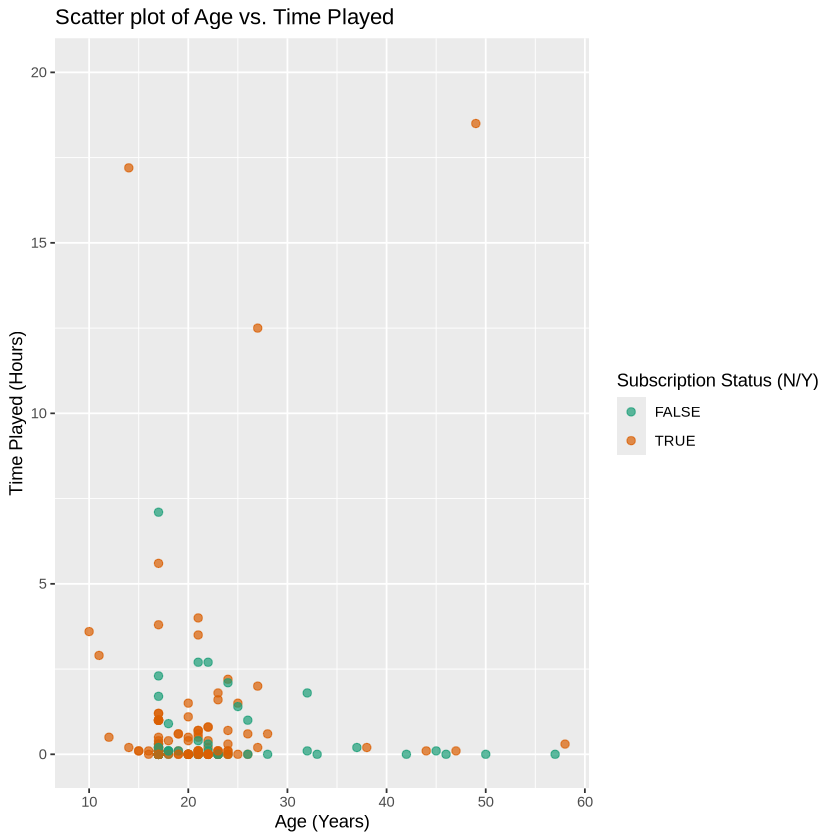

In [69]:
#Imports R Color Brewer library to colour the points
library(RColorBrewer)

hours_age_plot <- players_wrangled |> ggplot(aes(x = Age, y = played_hours, color = subscribe))+
    #Sets transparency for better visibility
    geom_point(alpha = 0.7, size = 2)+
    #Sets color palette as Dark2
    scale_color_brewer(palette = "Dark2")+
    #Axes, legend, graph titles
    labs(title = "Scatter plot of Age vs. Time Played",
         x = "Age (Years)",
         y = "Time Played (Hours)",
         color = "Subscription Status (N/Y)"
         )+
    #Sets a limit on the Y-axis to get rid of outliers and to get a better visualization of the graph
    ylim(0,20)

hours_age_plot

After limiting the Y-axis to remove outlier values, it appears that both subscribed and non-subscribed players tend to be quite young and have low playtimes. It is also clear that the majority of players are subscribed, meaning that to build an accurate predictive model, upsampling on non-subscribed players will be needed.

In order to better visualize the distribution of players, we will create a **histogram** to see the ages of players.

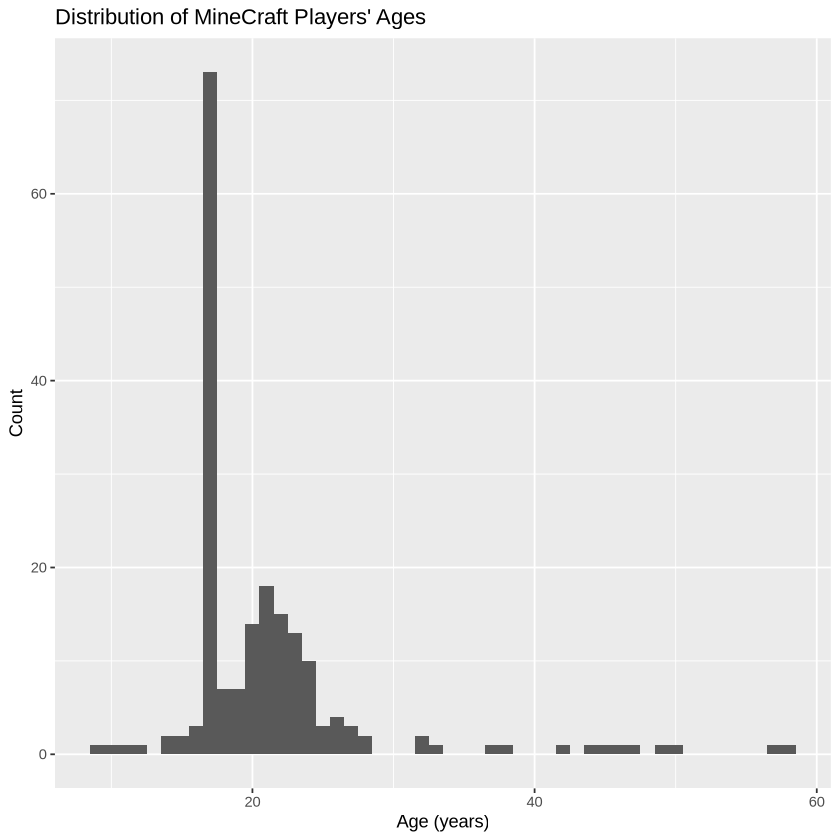

In [10]:
age_distribution <- players_wrangled |>
    ggplot(aes(x = Age))+
    geom_histogram(binwidth = 1)+
    labs(x = "Age (years)", y = "Count", title = "Distribution of MineCraft Players' Ages")
age_distribution

These results prove our table analysis are quite correct. The majority of players are quite young, however an outstanding majority of players are age 17, meaning they are just starting university or are in Grade 12. 

Now, a similar plot will be made to visualize played_hours.

Warning message:
“Removed 13 rows containing non-finite outside the scale range (`stat_bin()`).”
Warning message:
“Removed 1 row containing missing values or values outside the scale range
(`geom_bar()`).”


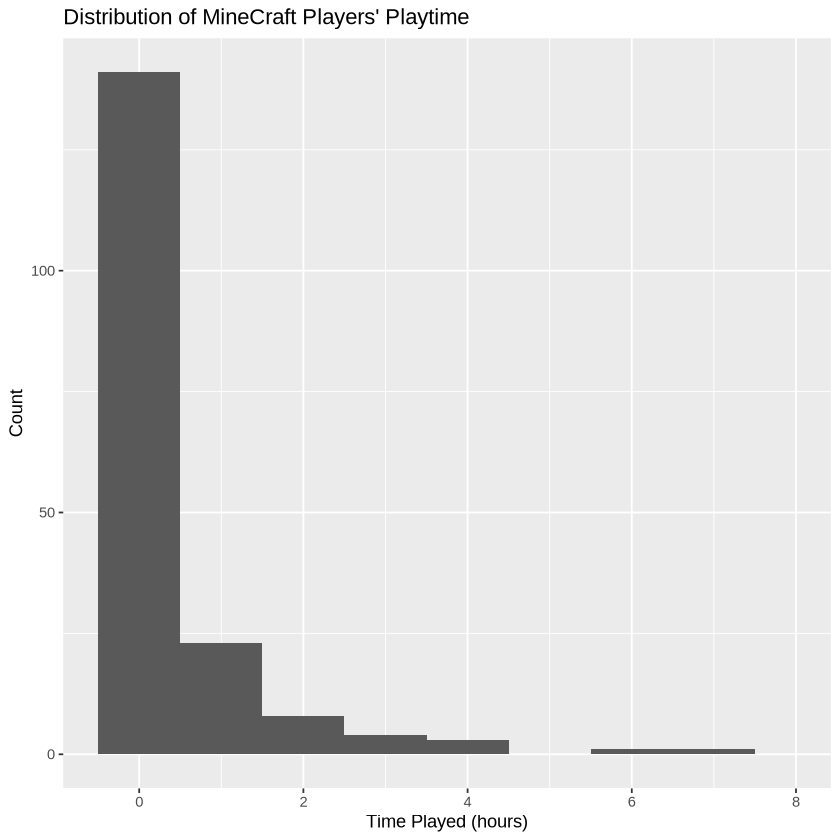

In [25]:
hours_distribution <- players_wrangled |>
    ggplot(aes(x = played_hours))+
    geom_histogram(binwidth = 1)+
    scale_x_continuous(limits = c(-0.5,8))+
    labs(x = "Time Played (hours)", y = "Count", title = "Distribution of MineCraft Players' Playtime")
hours_distribution

Limiting the x axis from 0 to 8, we see that over 100 players do not even play 1 hour of the game, consistent with our previous analysis. This could be for a number of reasons, which will be covered in the discussion section.

We want to split the data between 75% training and 25% test set. The **initial_split** function shuffles the data before splitting and stratifies the data by the class label. Shuffling the data ensures that any ordering present in the data doesn't influence the data that ends up in the graining and testing sets. Stratifying the data by the class label ensures that roughly the same proportion of each class ends up in both the training and test sets.

In [5]:
set.seed(100)

players_split <- initial_split(players_wrangled, prop = 0.75, strata = subscribe)
players_train <- training(players_split)
players_test <- testing(players_split)

glimpse(players_train)
glimpse(players_test)

Rows: 145
Columns: 3
$ subscribe    <fct> FALSE, FALSE, FALSE, FALSE, FALSE, FALSE, FALSE, FALSE, F…
$ played_hours <dbl> 0.0, 0.0, 0.1, 0.1, 0.0, 1.4, 0.0, 0.0, 0.9, 0.0, 0.1, 0.…
$ Age          <dbl> 17, 21, 17, 18, 33, 25, 24, 23, 18, 42, 22, 37, 21, 23, 1…
Rows: 49
Columns: 3
$ subscribe    <fct> TRUE, FALSE, TRUE, TRUE, FALSE, TRUE, TRUE, TRUE, TRUE, T…
$ played_hours <dbl> 0.0, 0.0, 0.6, 0.6, 0.0, 0.4, 0.1, 0.1, 0.1, 53.9, 0.0, 0…
$ Age          <dbl> 19, 22, 19, 28, 23, 20, 17, 23, 15, 17, 22, 17, 17, 28, 1…


We create the standardization preprocessing using **only our training data** to ensure that our test data doesn't influence any aspect of our model training.

In [6]:
players_recipe <- recipe(subscribe ~ played_hours + Age, data = players_train) |>
    step_scale(all_predictors()) |>
    step_center(all_predictors())|>
    step_upsample(subscribe)

players_spec <- nearest_neighbor(weight_func = "rectangular", neighbors = tune()) |>
    set_engine("kknn") |>
    set_mode("classification")

players_workflow <- workflow() |>
    add_recipe(players_recipe) |>
    add_model(players_spec) 
players_workflow

══ Workflow ════════════════════════════════════════════════════════════════════
Preprocessor: Recipe
Model: nearest_neighbor()

── Preprocessor ────────────────────────────────────────────────────────────────
3 Recipe Steps

• step_scale()
• step_center()
• step_upsample()

── Model ───────────────────────────────────────────────────────────────────────
K-Nearest Neighbor Model Specification (classification)

Main Arguments:
  neighbors = tune()
  weight_func = rectangular

Computational engine: kknn 


In [7]:
set.seed(100)

players_vfold <- vfold_cv(players_train, v = 5, strata = subscribe)

- The classifier is tuned by searching over a range of possible k values, which in this case is 1 to 20.
- Using the **tune_grid()** function, the model is repeatedly fitted on different folds and the performance metrics for each k option are computed.
- The .metric is filtered for accuracy to identify which k produces the best performance.

In [70]:
k_vals <- tibble(neighbors = seq(from = 1, to = 20, by = 1))

players_results <- tune_grid(players_workflow, resamples = players_vfold, grid = k_vals)
player_metrics <- collect_metrics(players_results)

accuracies <- player_metrics |>
    filter(.metric == "accuracy")
accuracies

neighbors,.metric,.estimator,mean,n,std_err,.config
<dbl>,<chr>,<chr>,<dbl>,<int>,<dbl>,<chr>
1,accuracy,binary,0.5039901,5,0.05765464,Preprocessor1_Model01
2,accuracy,binary,0.4970936,5,0.06068480,Preprocessor1_Model02
3,accuracy,binary,0.4556814,5,0.04941970,Preprocessor1_Model03
4,accuracy,binary,0.4628243,5,0.05508412,Preprocessor1_Model04
5,accuracy,binary,0.4694745,5,0.05309704,Preprocessor1_Model05
6,accuracy,binary,0.4623317,5,0.04877134,Preprocessor1_Model06
7,accuracy,binary,0.4497209,5,0.05173611,Preprocessor1_Model07
8,accuracy,binary,0.4635140,5,0.05345006,Preprocessor1_Model08
9,accuracy,binary,0.4487685,5,0.04080352,Preprocessor1_Model09


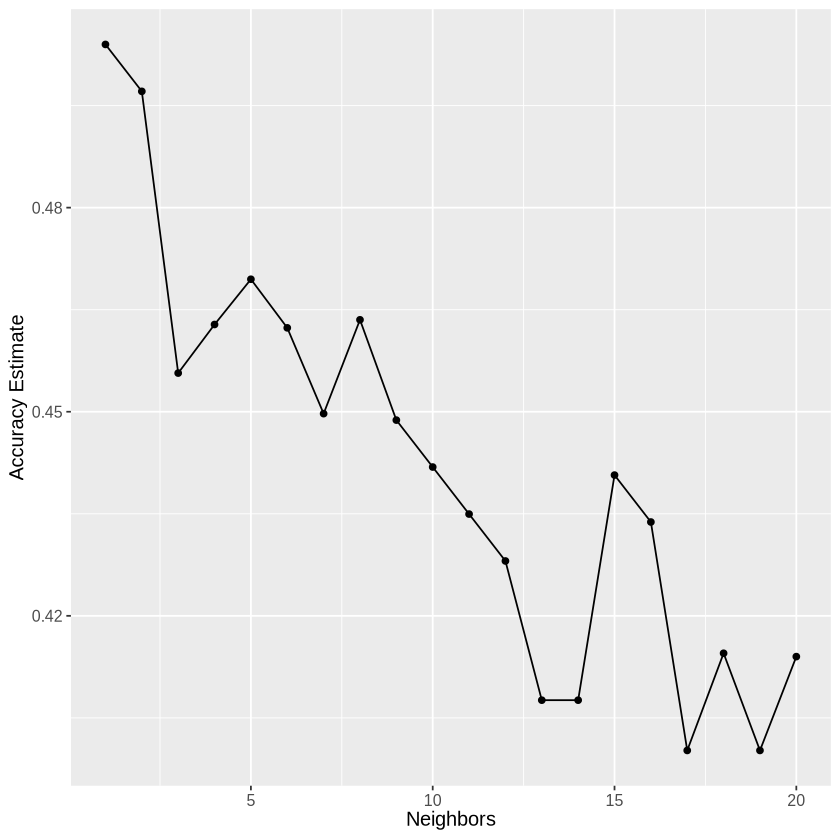

In [71]:
accuracy_vs_k <- ggplot(accuracies, aes(x = neighbors, y = mean)) +
    geom_point() +
    geom_line() +
    labs(x = "Neighbors", y = "Accuracy Estimate") +
    theme(text = element_text(size = 12))
accuracy_vs_k

In [10]:
best_k <- accuracies |>
    arrange(desc(mean)) |>
    head(1) |>
    pull(neighbors)
best_k

[1] 1

We can see that K = 1 provides the highest cross-validation accuracy estimate. However, it may not be the best K value because if we have only one K, the classifier would depend entirely on a single neighbor, making it sensitive to noise and outliers. Therefore, it is safer to use K = 2, especially knowing that the difference between the accuracy estimates for K = 1 and K = 2 is not that much.

Now, we can evaluate our classifier on the test set!

In [12]:
players_recipe <- recipe(subscribe ~ played_hours + Age, data = players_train) |>
    step_scale(all_predictors()) |>
    step_center(all_predictors())

players_spec <- nearest_neighbor(weight_func = "rectangular", neighbors = 2) |>
    set_engine("kknn") |>
    set_mode("classification")

players_fit <- workflow() |>
    add_recipe(players_recipe) |>
    add_model(players_spec) |>
    fit(data = players_train)
players_fit

══ Workflow [trained] ══════════════════════════════════════════════════════════
Preprocessor: Recipe
Model: nearest_neighbor()

── Preprocessor ────────────────────────────────────────────────────────────────
2 Recipe Steps

• step_scale()
• step_center()

── Model ───────────────────────────────────────────────────────────────────────

Call:
kknn::train.kknn(formula = ..y ~ ., data = data, ks = min_rows(2,     data, 5), kernel = ~"rectangular")

Type of response variable: nominal
Minimal misclassification: 0.4965517
Best kernel: rectangular
Best k: 2

In [13]:
players_test_predictions <- predict(players_fit, players_test) |>
    bind_cols(players_test) 

In [72]:
players_test_predictions |> metrics(truth = subscribe, estimate = .pred_class) |>
    filter(.metric == "accuracy")
head(players_test_predictions, n = 10)

.metric,.estimator,.estimate
<chr>,<chr>,<dbl>
accuracy,binary,0.5714286


.pred_class,subscribe,played_hours,Age
<fct>,<fct>,<dbl>,<dbl>
TRUE,TRUE,0.0,19
TRUE,FALSE,0.0,22
TRUE,TRUE,0.6,19
TRUE,TRUE,0.6,28
FALSE,FALSE,0.0,23
TRUE,TRUE,0.4,20
FALSE,TRUE,0.1,17
TRUE,TRUE,0.1,23
TRUE,TRUE,0.1,15


In [15]:
players_test_predictions |> precision(truth = subscribe, estimate = .pred_class, event_level="first")

.metric,.estimator,.estimate
<chr>,<chr>,<dbl>
precision,binary,0.2777778


In [16]:
players_test_predictions |> recall(truth = subscribe, estimate = .pred_class, event_level="first")

.metric,.estimator,.estimate
<chr>,<chr>,<dbl>
recall,binary,0.3846154


In [73]:
confusion <- players_test_predictions |>
    conf_mat(truth = subscribe, estimate = .pred_class)
confusion

          Truth
Prediction FALSE TRUE
     FALSE     5   13
     TRUE      8   23

- The classifier achieved an **accuracy** of about **57.1%**, meaning it correctly predicted subscription status for about 57.1% of players.
- The classifier's **precision** is roughly **27.8%**
- The classifier's **recall** is roughly **38.5%**


## 3. Discussion and Conclusion

The central question guiding this investigation was whether a player’s age and total hours played meaningfully contribute to their likelihood of subscribing to the game’s newsletter. Based on the results of the classification model, it appears that neither variable serves as a strong predictor of subscription behavior. The model’s overall accuracy was approximately 57.1%, with a precision of about 27.8% and a recall of roughly 38.5%. These relatively low performance metrics suggest that the classifier struggled to distinguish subscribed players from non-subscribed players based solely on age and playtime. This outcome aligns with the visual data exploration conducted earlier, which revealed no clear or consistent patterns differentiating the two groups in relation to these variables. 

The findings provide important insight into the relationship between player age, player engagement and newsletter subscription rate. The weak accuracy of the predictor variables suggest that these alone are insufficient in understanding what a player’s likelihood is of subscribing to game-related newsletters. This means that marketers may not target potential subscribers based on age or amount of hours played, as there is no real relationship observed. Instead of this, marketers may choose to focus on other aspects, such as looking at using incentives for subscribing, or looking at players’ previous experiences when looking for people to target. From a game development perspective, developers can now understand that age and playtime do not necessarily indicate whether someone will subscribe or not. This means that when creating games, they do not need to build them for specific ages or with specific difficulties to promote more playtime. Instead, more research should be done on investigating whether other factors, such as gender and experience have any effect on a player's subscription status. Doing so has the potential to provide better experiences for players, while also yielding impressive results for companies. Certain aspects such as features and communication could be improved in order to raise subscription numbers, leading to highly successful games that are also enjoyable for player-bases. 

Another area of future study would be to increase the depth of this study, looking at more detailed variables such as in-game participation, time spent playing relative to account creation and previous subscribing habits. Doing this allows for more in depth research to be conducted on this subject, and allows a mechanistic process to occur in order to determine why a player may choose to subscribe or not. Another future study could also change the genre of game observed, and focus on a game different to MineCraft’s construction nature, potentially drawing inspiration from games such as Fortnite or Animal Crossings. This would allow research into whether the genre of game attracts different demographics, and whether the genre contributes to differences in the way players subscribe. 

**Conclusion**

Overall, this study serves as an important step in understanding factors that contribute to player engagement in video games, and while the results may be inconclusive, important insight was gained in terms of highlighting key factors that may contribute to a player’s subscription status. Further research is needed in order to better comprehend player behaviours, however this project serves as a solid base for studies that could aid game developers and marketers create better products in terms of profitability and in terms of player enjoyment. 


## 4. References

Lee, Tiffany Timbers Trevor Campbell, and Melissa. Chapter 5 Classification I: Training and Predicting |  Data Science. 21 Aug. 2024, datasciencebook.ca/classification1.html#exploring-a-data-set.